# Notebook 1: Data Exploration

In [22]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime

# Sklearn preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Models
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from catboost import CatBoostRegressor

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks

print("Libraries imported successfully")

Libraries imported successfully


In [ ]:
# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Data path
data_path = 'data/Loan_data.csv'
data_description_path = 'data/Dictionnaire_des_données.xlsx'

# Helper functions
import utils 

In [24]:
# Load data
df = pd.read_csv(data_path, )

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
df.head()

Dataset shape: (20000, 36)

Columns: ['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount', 'LoanDuration', 'MaritalStatus', 'NumberOfDependents', 'HomeOwnershipStatus', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore']


,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,2,Own,183,0.354418,1,2,0.358336,0,Home,0,29,9,7632,1202,146111,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,1,Mortgage,496,0.087827,5,3,0.330274,0,Debt Consolidation,0,21,9,4627,3460,53204,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,Rent,902,0.137414,2,0,0.244729,0,Education,0,20,22,886,895,25176,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,1,Mortgage,755,0.267587,2,1,0.436244,0,Home,0,27,10,1675,1217,104822,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,1,Mortgage,274,0.320535,0,0,0.078884,0,Debt Consolidation,0,26,27,1555,4981,244305,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [25]:
# Basic statistics
print("=" * 80)
print("DATASET INFORMATION")
print("=" * 80)
df.info()

DATASET INFORMATION


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [26]:
# Descriptive statistics
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,0.993000,0.285735,0.052400,0.100050,23.993650,14.957300,4946.052150,1782.555100,9.696440e+04,3.625241e+04,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,0.986965,0.160211,0.222838,0.300074,4.945436,8.371552,6604.887477,2245.378812,1.207999e+05,4.725151e+04,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,0.000000,0.001720,0.000000,0.000000,8.000000,1.000000,73.000000,24.000000,2.098000e+03,3.720000e+02,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,0.000000,0.161035,0.000000,0.000000,21.000000,8.000000,1541.750000,551.000000,3.118025e+04,1.119675e+04,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,1.000000,0.264454,0.000000,0.000000,24.000000,15.000000,2986.000000,1116.000000,6.069900e+04,2.220300e+04,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,2.000000,0.390327,0.000000,0.000000,27.000000,22.000000,5873.250000,2126.000000,1.174052e+05,4.314650e+04,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,7.000000,0.902253,1.000000,1.000000,45.000000,29.000000,200089.000000,52572.000000,2.619627e+06,1.417302e+06,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [27]:
# Check for missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print("Missing values detected:")
    print(missing_df)
else:
    print("No missing values detected")

No missing values detected


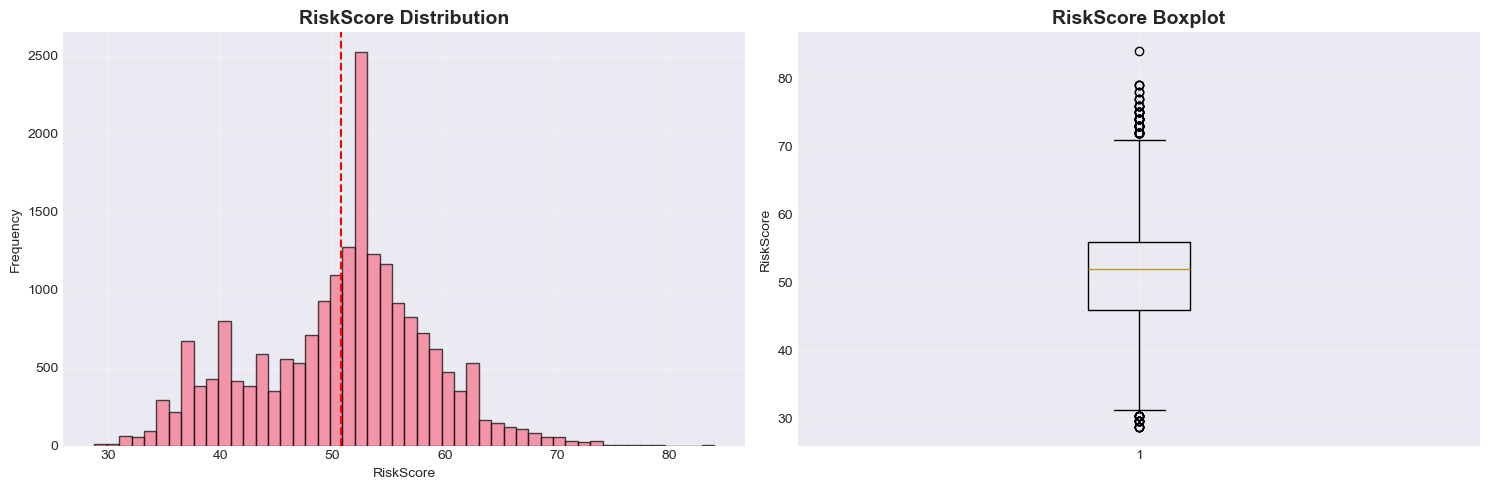

RiskScore Statistics:
  Mean: 50.77
  Median: 52.00
  Std: 7.78
  Min: 28.80
  Max: 84.00


In [28]:
# Target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['RiskScore'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('RiskScore Distribution', fontsize=14, fontweight='bold')
mean_val = df['RiskScore'].mean()
axes[0].axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean : {mean_val:.1f}')
axes[0].set_xlabel('RiskScore')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Boxplot
axes[1].boxplot(df['RiskScore'], vert=True)
axes[1].set_title('RiskScore Boxplot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('RiskScore')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"RiskScore Statistics:")
print(f"  Mean: {df['RiskScore'].mean():.2f}")
print(f"  Median: {df['RiskScore'].median():.2f}")
print(f"  Std: {df['RiskScore'].std():.2f}")
print(f"  Min: {df['RiskScore'].min():.2f}")
print(f"  Max: {df['RiskScore'].max():.2f}")

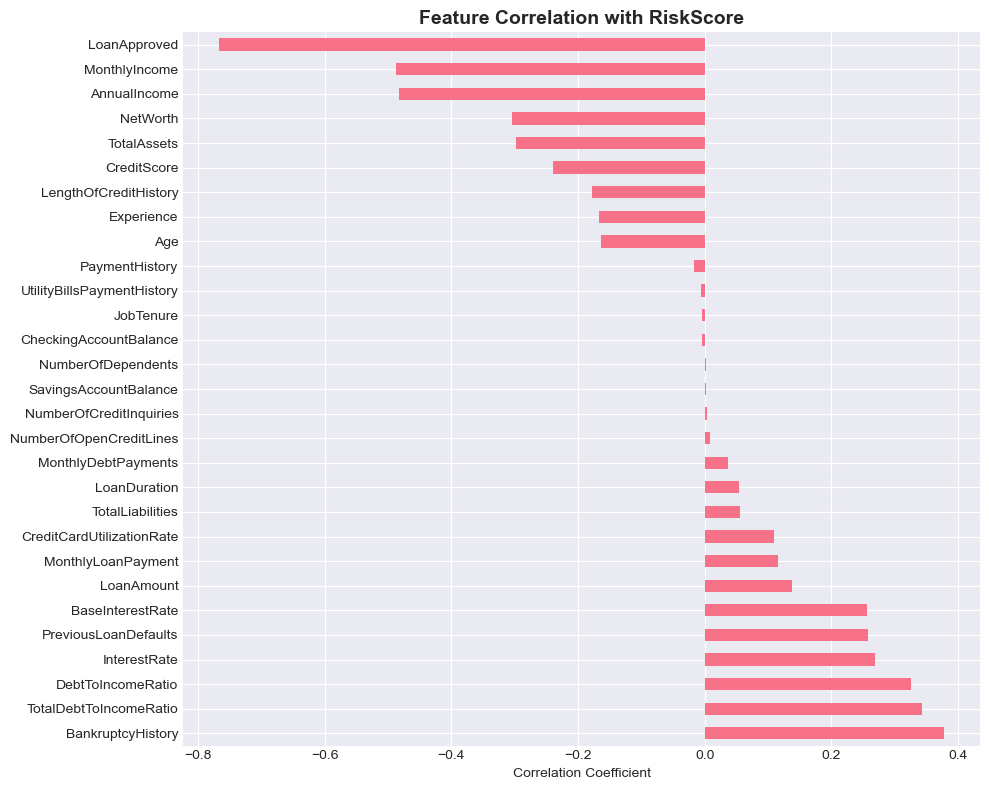


Top 10 positively correlated features:
BankruptcyHistory            0.377578
TotalDebtToIncomeRatio       0.342643
DebtToIncomeRatio            0.326500
InterestRate                 0.268203
PreviousLoanDefaults         0.258659
BaseInterestRate             0.256233
LoanAmount                   0.137981
MonthlyLoanPayment           0.115501
CreditCardUtilizationRate    0.108758
TotalLiabilities             0.055617
Name: RiskScore, dtype: float64

Top 10 negatively correlated features:
LoanApproved            -0.766137
MonthlyIncome           -0.487039
AnnualIncome            -0.483289
NetWorth                -0.304333
TotalAssets             -0.297117
CreditScore             -0.240198
LengthOfCreditHistory   -0.177796
Experience              -0.166496
Age                     -0.164304
PaymentHistory          -0.016992
Name: RiskScore, dtype: float64


In [29]:
# Correlation with target variable
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
correlations = df[numerical_cols].corr()['RiskScore'].sort_values(ascending=False)


plt.figure(figsize=(10, 8))
correlations[1:].plot(kind='barh')
plt.title('Feature Correlation with RiskScore', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

print("\nTop 10 positively correlated features:")
print(correlations[1:11])

print("\nTop 10 negatively correlated features:")
print(correlations[-10:].iloc[::-1])

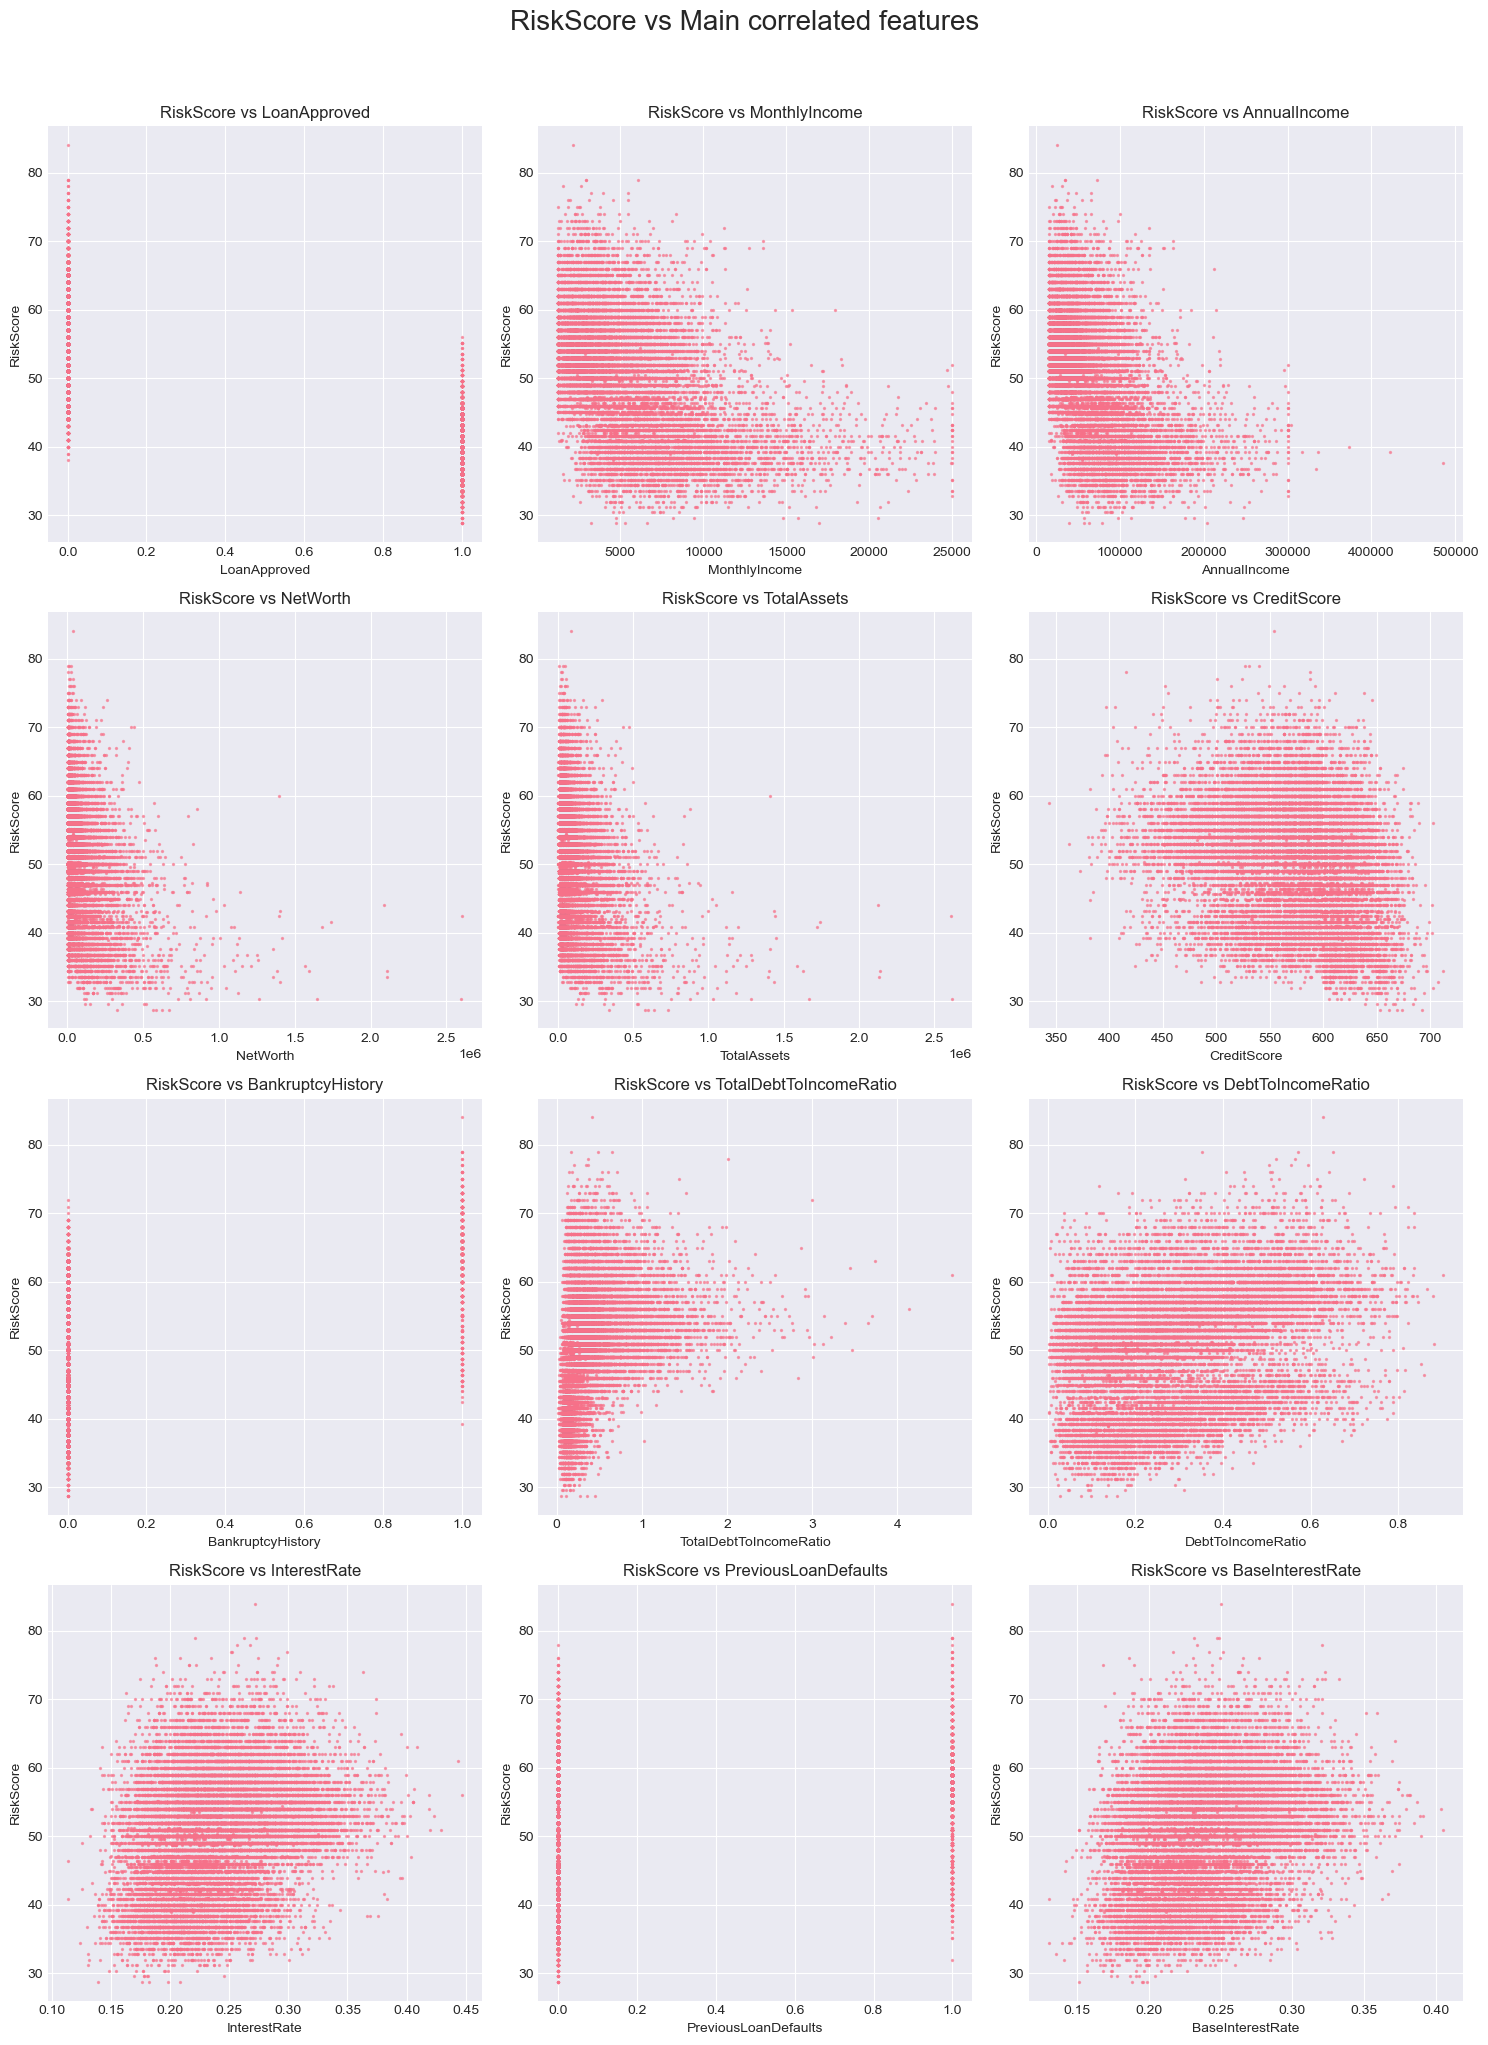

In [ ]:
#Visualise correlated features (in the report)
correlated_cols = ['LoanApproved', 'MonthlyIncome', 'AnnualIncome', 'NetWorth','TotalAssets', 'CreditScore', 'BankruptcyHistory', 'TotalDebtToIncomeRatio', 'DebtToIncomeRatio', 'InterestRate', 'PreviousLoanDefaults', 'BaseInterestRate'  ]


if len(correlated_cols) > 0:
    n_cols = 3
    n_rows = (len(correlated_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes]
    fig.suptitle('RiskScore vs Main correlated features', fontsize=20, y=1.02)
    for idx, col in enumerate(correlated_cols):
        axes[idx].scatter(df[col], df['RiskScore'], alpha=0.6, s= 2)
        axes[idx].set_title(f'{'RiskScore'} vs {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('RiskScore')

    # Hide unused subplots
    for idx in range(len(correlated_cols), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()


Numerical features: ['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore']
Continuous numerical features: ['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'DebtToIncomeRatio', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToInc

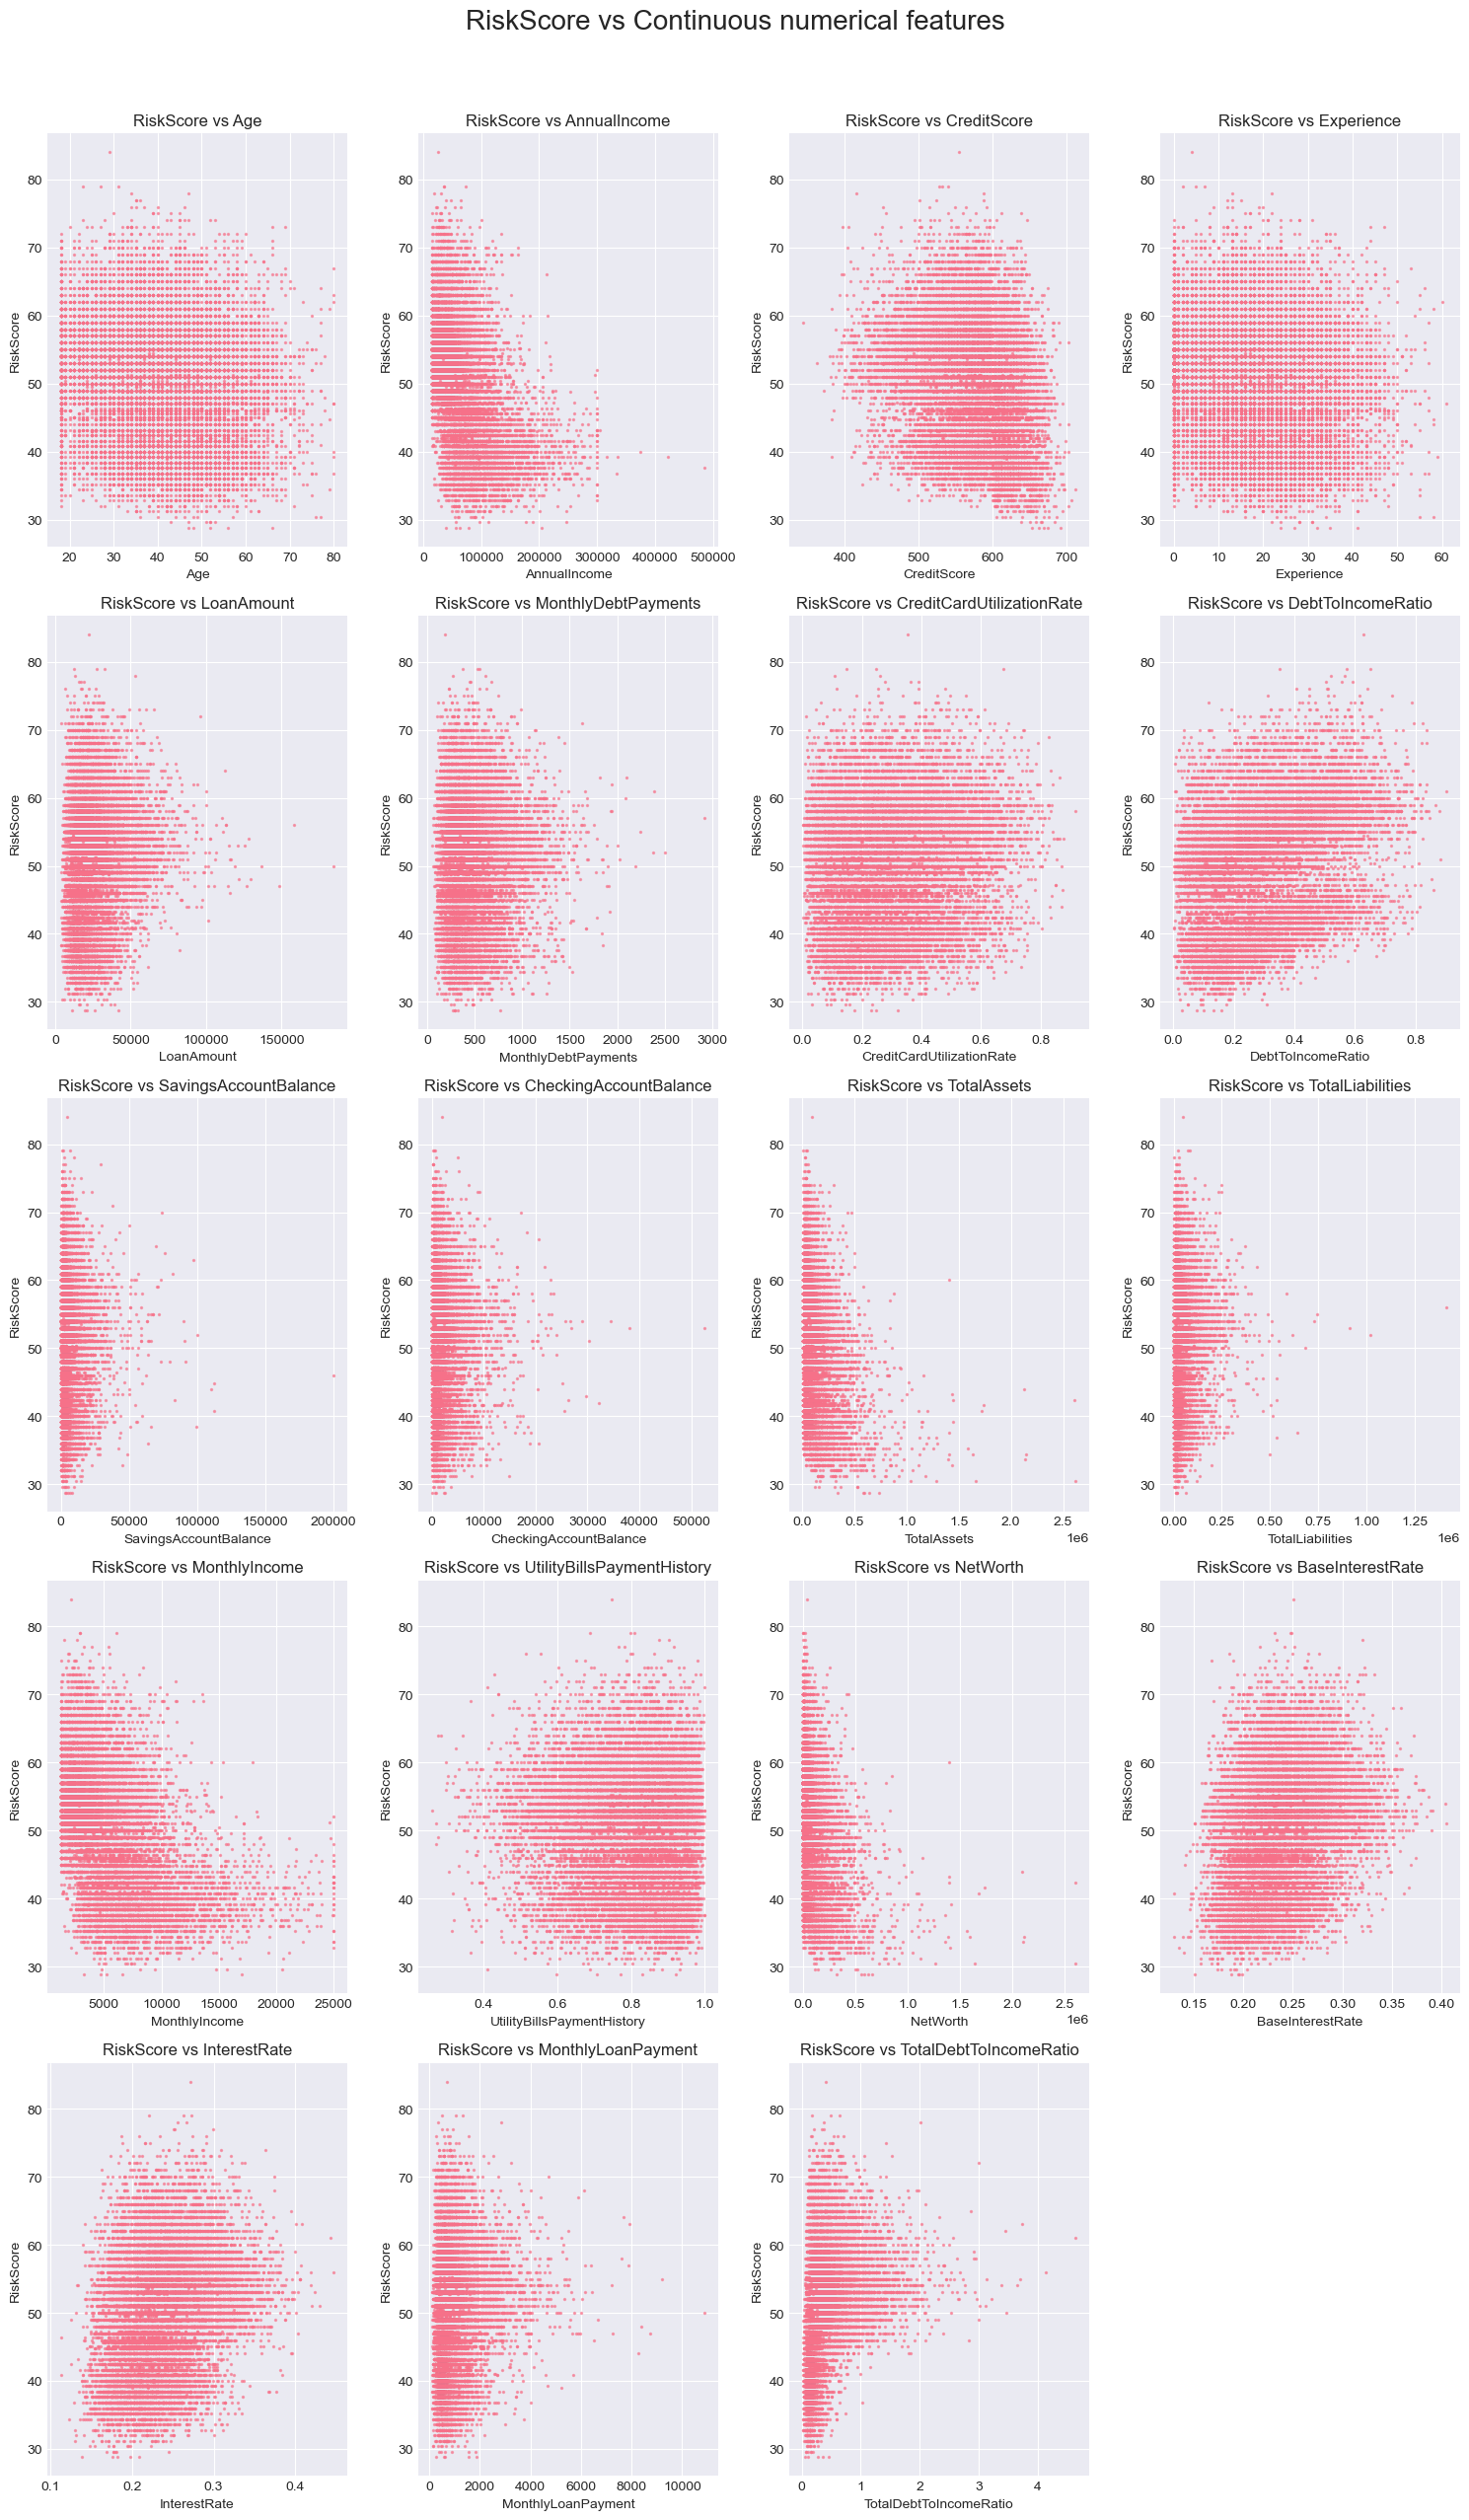

In [ ]:
#Visualise RiskScore vs ALL continous numerical features (not in the report)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical features: {numerical_cols}")

continous_numerical = [c for c in numerical_cols if c not in ['Income_Decile','PreviousLoanDefaults', 'LoanApproved', 'BankruptcyHistory', 'LoanDuration', 
                                                              'NumberOfDependents', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'PaymentHistory', 
                                                              'LengthOfCreditHistory', 'JobTenure', 'RiskScore']]
print(f"Continuous numerical features: {continous_numerical}")


if len(continous_numerical) > 0:
    n_cols = 4
    n_rows = (len(continous_numerical) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes]
    fig.suptitle('RiskScore vs Continuous numerical features', fontsize=20, y=1.02)
    for idx, col in enumerate(continous_numerical):
        axes[idx].scatter(df[col], df['RiskScore'], alpha=0.6, s= 2)
        axes[idx].set_title(f'{'RiskScore'} vs {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('RiskScore')

    # Hide unused subplots
    for idx in range(len(continous_numerical), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()



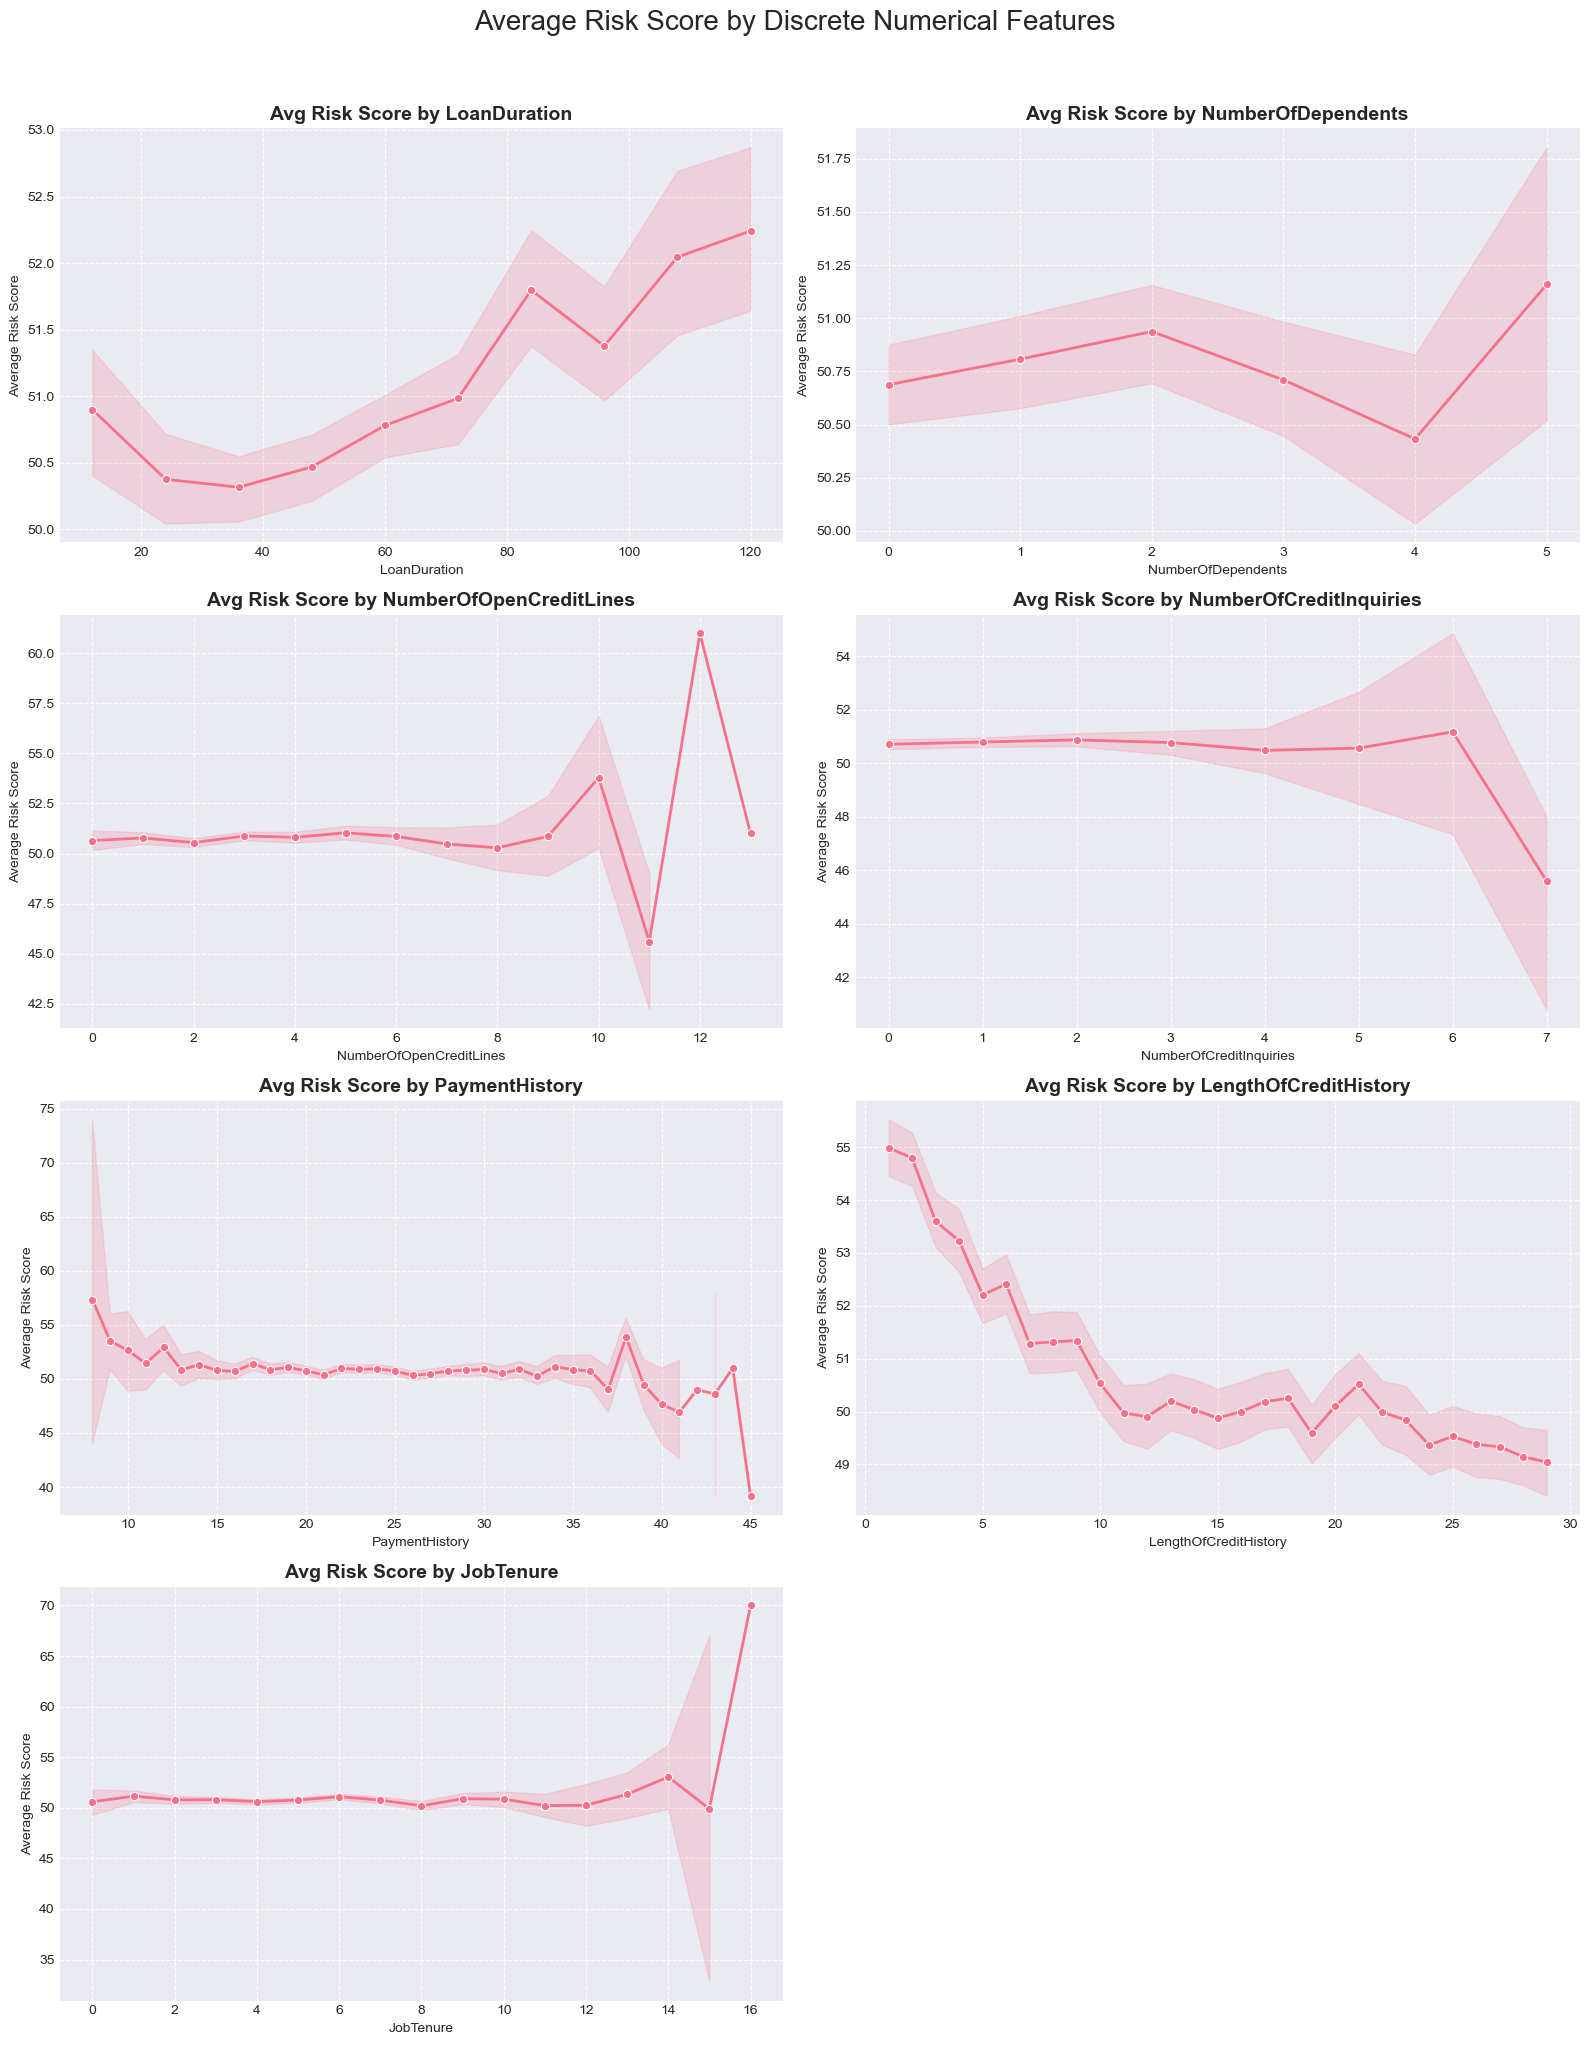

In [ ]:
#Visualise Average RiskScore for discrete numerical variables (not in the report)
discrete_numerical = [ 'LoanDuration', 'NumberOfDependents', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'PaymentHistory', 'LengthOfCreditHistory', 'JobTenure']

n_cols = 2
n_rows = (len(discrete_numerical) + 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
fig.suptitle('Average Risk Score by Discrete Numerical Features', fontsize=20, y=1.02)
axes = axes.flatten()

for i, col in enumerate(discrete_numerical):
    if col in df.columns:
        sns.lineplot(data=df, x=col, y='RiskScore', ax=axes[i], marker='o', linewidth=2)
        axes[i].set_title(f'Avg Risk Score by {col}', fontsize=14, fontweight='bold')
        axes[i].set_ylabel('Average Risk Score')
        axes[i].set_xlabel(col)
        axes[i].grid(True, linestyle='--', alpha=1)

for j in range(i + 1, len(axes)): # Hide unused subplots
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

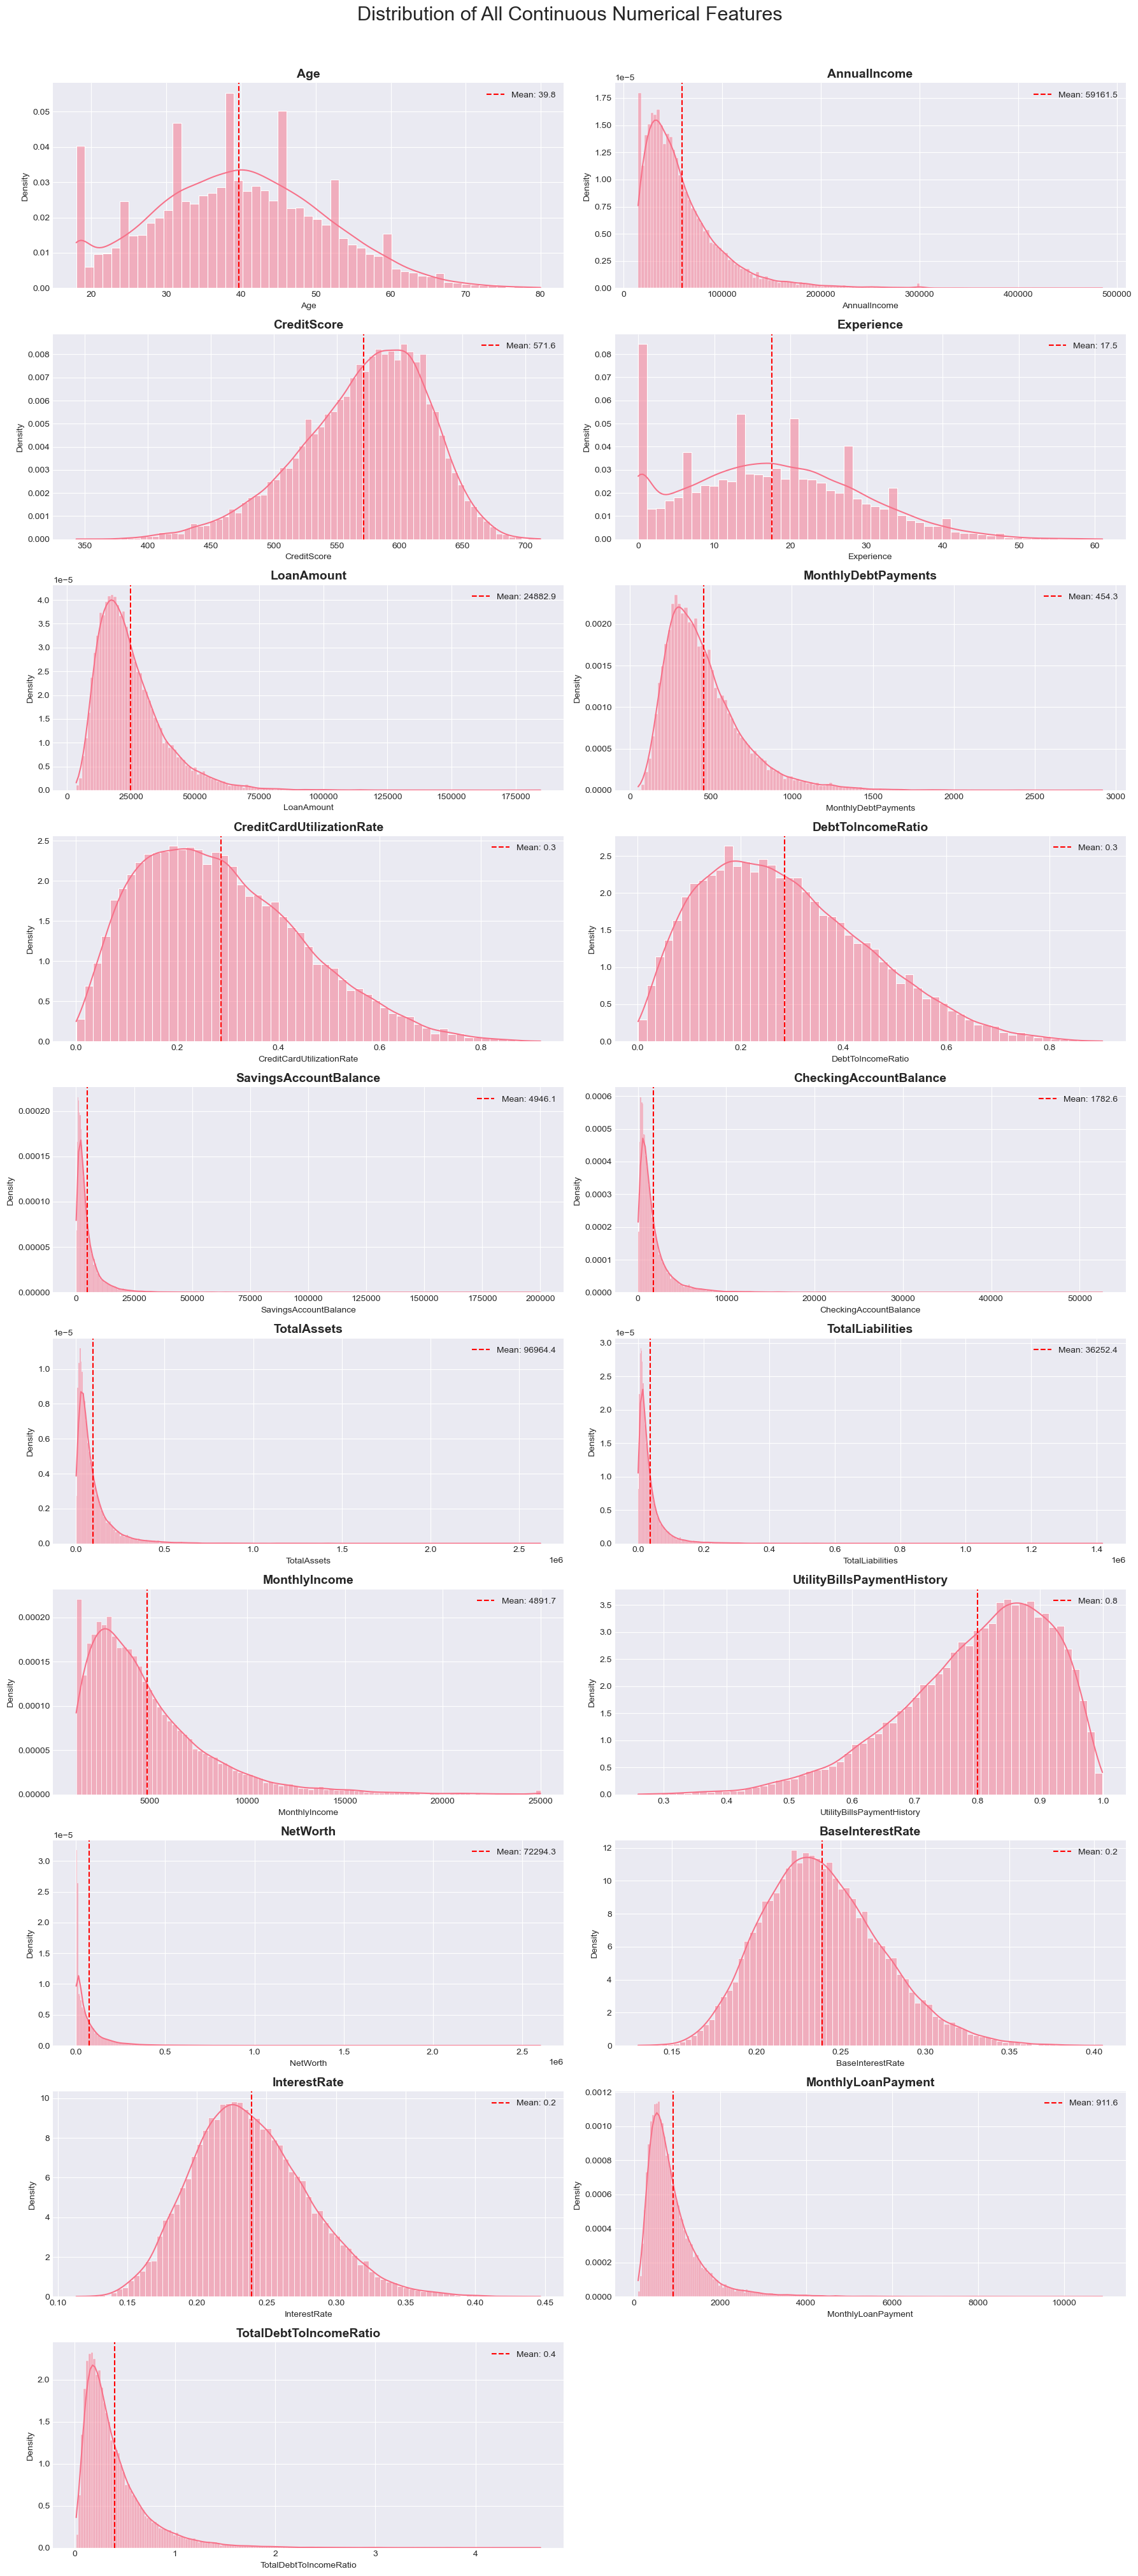

In [ ]:
#Visualise distribution of ALL continuous variables (not in the report)

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
continous_numerical = [c for c in numerical_cols if c not in ['Income_Decile','PreviousLoanDefaults', 'LoanApproved', 'BankruptcyHistory', 'LoanDuration', 
                                                              'NumberOfDependents', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'PaymentHistory', 
                                                              'LengthOfCreditHistory', 'JobTenure', 'RiskScore']]



n_cols = 2  
n_rows = (len(continous_numerical) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
fig.suptitle('Distribution of All Continuous Numerical Features', fontsize=22, y=1.01)


axes = axes.flatten()


for i, col in enumerate(continous_numerical):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], edgecolor='white', stat='density')
    mean_val = df[col].mean()
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.1f}')
    axes[i].legend() 
    axes[i].set_title(col, fontsize=14, fontweight='bold')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Density')

# Clean empty plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

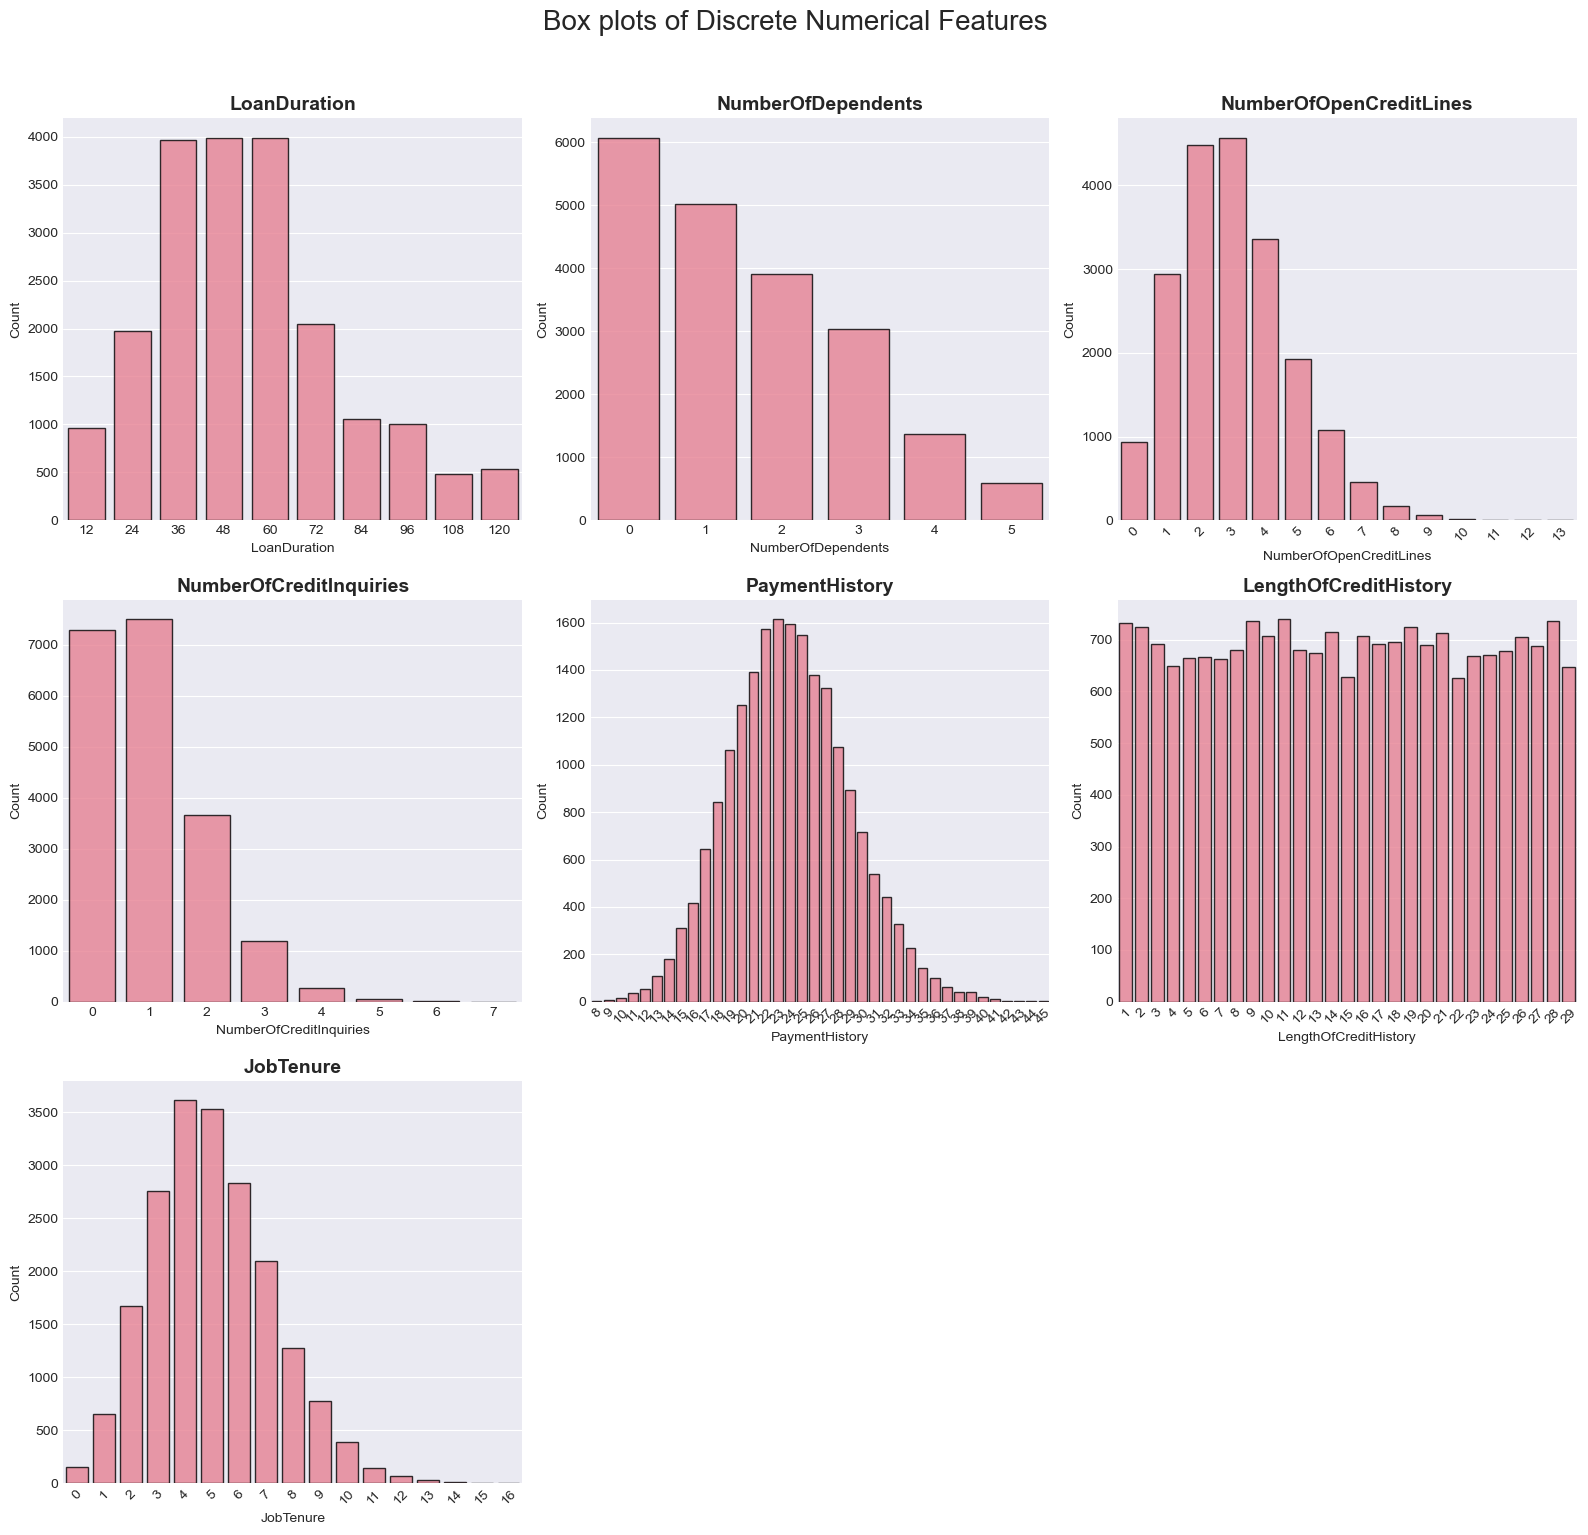

In [ ]:
# Visualisation of discrete numerical values (not in report)

n_cols = 3
n_rows = (len(discrete_numerical) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
fig.suptitle('Box plots of Discrete Numerical Features', fontsize=20, y=1.02)

# Flatten axes for easy iteration
axes = axes.flatten()

# 3. Loop through features and plot
for i, col in enumerate(discrete_numerical):
    if col in df.columns:
        sns.countplot(data=df, x=col, ax=axes[i], edgecolor='black', alpha=0.8)
        axes[i].set_title(col, fontsize=14, fontweight='bold')
        axes[i].set_ylabel('Count')
        
        # If a variable like has too many bars, rotate the labels
        if df[col].nunique() > 10:
            axes[i].tick_params(axis='x', rotation=45)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()